In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
fill_list = usedu_df.select_dtypes(include=['float64'])

years = usedu_df['YEAR'].unique()

for year in years:
 usedu_df.fillna({x: usedu_df.loc[usedu_df["YEAR"] == year][x].mean() for x in fill_list}, inplace = True)

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

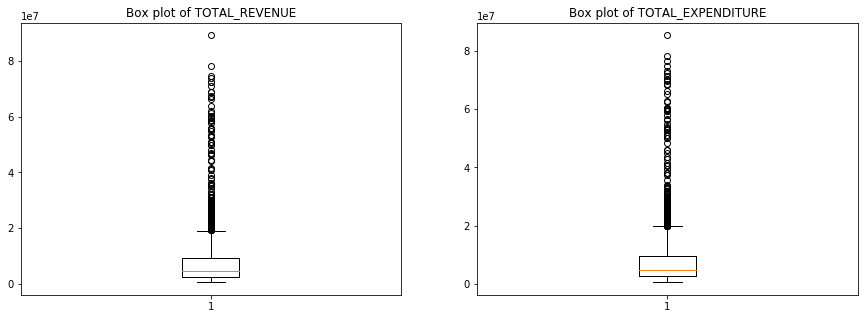

In [4]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.boxplot(usedu_df['TOTAL_REVENUE'])
plt.title("Box plot of TOTAL_REVENUE")
                      
plt.subplot(1, 2, 2)
plt.boxplot(usedu_df["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_EXPENDITURE")
                      
plt.show()

As we see from the boxplots, both variables have outlier values.

In [12]:
def outliers(x):
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    return len((np.where((x > max_val) 
                      | (x < min_val))[0]))

print("Number of outliers for TOTAL_REVENUE is: {}\n".format(outliers(usedu_df['TOTAL_REVENUE'])))
print("Number of outliers for TOTAL_EXPENDITURE is: {}".format(outliers(usedu_df['TOTAL_EXPENDITURE'])))
    

Number of outliers for TOTAL_REVENUE is: 150

Number of outliers for TOTAL_EXPENDITURE is: 148


2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [34]:
winsorized_revenue = winsorize(usedu_df["TOTAL_REVENUE"], (0, 0.15))
winsorized_expenditure = winsorize(usedu_df["TOTAL_EXPENDITURE"], (0, 0.10))

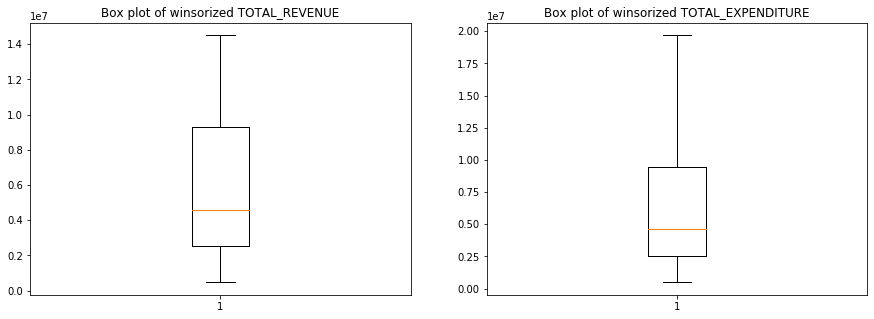

Number of outliers for winsorized TOTAL_REVENUE is: 0

Number of outliers for winsorized TOTAL_EXPENDITURE is: 0


In [35]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.boxplot(winsorized_revenue)
plt.title("Box plot of winsorized TOTAL_REVENUE")
                      
plt.subplot(1, 2, 2)
plt.boxplot(winsorized_expenditure)
plt.title("Box plot of winsorized TOTAL_EXPENDITURE")
                      
plt.show()

print("Number of outliers for winsorized TOTAL_REVENUE is: {}\n".format(outliers(winsorized_revenue)))
print("Number of outliers for winsorized TOTAL_EXPENDITURE is: {}".format(outliers(winsorized_expenditure)))

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

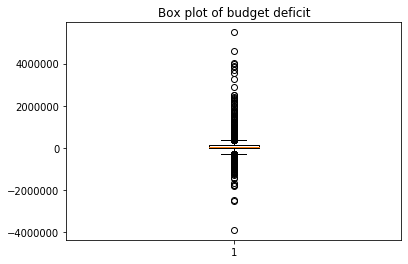

Number of outliers for b_deficit is: 275


In [18]:
b_deficit = usedu_df["TOTAL_EXPENDITURE"] - usedu_df["TOTAL_REVENUE"]

plt.boxplot(b_deficit)
plt.title("Box plot of budget deficit")

plt.show()

print("Number of outliers for b_deficit is: {}".format(outliers(b_deficit)))
                      

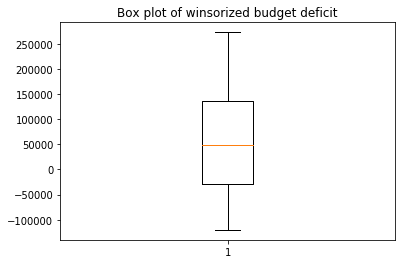

Number of outliers for winsorized b_deficit is: 0


In [22]:
winsorized_b_deficit = winsorize(b_deficit, (0.15, 0.15))

plt.boxplot(winsorized_b_deficit)
plt.title("Box plot of winsorized budget deficit")

plt.show()

print("Number of outliers for winsorized b_deficit is: {}".format(outliers(winsorized_b_deficit)))
                      


4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [47]:
b_deficit2 = usedu_df["TOTAL_EXPENDITURE"] - usedu_df["TOTAL_REVENUE"]

print("Number of outliers for b_deficit2 is: {}".format(outliers(b_deficit2)))

q75, q25 = np.percentile(b_deficit2, [75 ,25])
iqr = q75 - q25

min_val = q25 - (iqr*1.5)
max_val = q75 + (iqr*1.5)

b_deficit3 = b_deficit2.drop((np.where((b_deficit2 > max_val) | (b_deficit2 < min_val))[0]))

print("Number of outliers for b_deficit2 after dropping outliers is: {}".format(outliers(b_deficit3)))


Number of outliers for b_deficit2 is: 275
Number of outliers for b_deficit2 after dropping outliers is: 157


5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [48]:
pd.DataFrame({"Original budget dificit": b_deficit, "Winsorized budget dificit": winsorized_b_deficit,
              "Dropped budget dificit": b_deficit3}).describe()

,Original budget dificit,Winsorized budget dificit,Dropped budget dificit
count,1.492000e+03,1492.000000,1217.000000
mean,1.012212e+05,58896.942478,45611.853884
std,5.311419e+05,128863.760849,122210.382130
min,-3.897129e+06,-120352.000000,-276540.000000
25%,-2.965425e+04,-29654.250000,-18847.000000
50%,4.849350e+04,48493.500000,40957.000000
75%,1.360070e+05,136007.000000,83899.000000
max,5.487742e+06,273298.000000,380115.000000


6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

looking at values of mean & med, the approach in the third step is more desirable because are closer to original valuse than the fourth step.